In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.tsa.stattools as ts    # use this library to find this out the p_value
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
import fix_yahoo_finance as yf

In [2]:
# predefined functions in this cell ,  no need to chagne them

def downloadStockData(tickers,start,end):
    """
        This function downloads the Close price of the stock and creates a dataframe from it
        Params:
            tickers : a list of ticker of various stocks
            start   : it is the start date of the data to be downloaded. It is a datetime in datetime format.
            end     : it is the end date of the data to be downloaded. It is a datetime in datetime format.

        Return:
            A dataframe with all the close for of each stock on each open market day
    """
    ticker_data = pdr.get_data_yahoo(tickers, start, end)['Close']
    return ticker_data

def zscore(series):
    return (series - series.mean()) / np.std(series)

def plot_ratios(ratio):
    """
        This function just plots the ratios plot 
        Params:
            ratio : a list of the the ration of two stock price 
    """
    ratios.plot()
    plt.axhline(ratios.mean(),color="yellow")
    plt.show()


In [3]:
def findCointegrationValue(data,p_value_threshold=0.05):
    """
        This function find out the pairs of stock with p value less than a constant
        Params:
            data               : the dataframe containning all the close for of each stock on each open market day
            p_value_threshold  : the threshold value for the p value of pairs of stocks. We consider a 2 stocks to be cointegrted only if the p value is less than this value

        Returns:
            p values of all the pairs , the list of all the pairs with p value less than the threshold 
    """
    pairs = []
    for i in range(len(data.columns)-1):
        for j in range(i+1, len(data.columns)):
            a = ts.coint(data.iloc[:,i], data.iloc[:,j])[1]
            if a<=p_value_threshold:
                pairs.append([data.columns[i], data.columns[j], a])
    return pairs

In [4]:
def getBestKCointergratedStocks(data,k=10,p_value_threshold=0.05):
    """
        This functions find out the k pairs with the least p value and all of them should be less than the threshold  
        Params:
            data               : the dataframe containning all the close for of each stock on each open market day
            k                  : the number of pairs to be found out
            p_value_threshold  : the threshold value for the p value of pairs of stocks. We consider a 2 stocks to be cointegrted only if the p value is less than this value

        Returns:
            the p value for all the pairs of stocks , the list k pairs with the least p value and their p values . If k such pairs doesn't exists return how many of them occur 
    """
    ans = findCointegrationValue(data, p_value_threshold)
    if k >= len(ans):
        return ans
    for i in range(len(ans)-1):
        for j in range(i+1, len(ans)):
            if ans[j][2]<ans[i][2]:
                ans[i], ans[j] = ans[j], ans[i]
    return ans[:k]


In [5]:
def distanceBetweenStocks(data1,data2):
    """
        This function takes list of two stocks and find the distance between the stocks
        Params:
            data1: list of stock price of stock1
            data2: list of stock price of stock2
            window_size : the window size
        Returns:
            the distance between the lists

        Note:
            In this function do try to normalise the stock price and try out some variations in it.
    """ 
    return sum(abs((data1 - data1.mean())/data1.std() - (data2 - data2.mean())/data2.std()))
    


In [31]:
def getBestKLessDistanceStocks(data,k=10):
    """
        This functions find out the k pairs with the least distance between them  
        Params:
            data               : the dataframe containning all the close for of each stock on each open market day
            k                  : the number of pairs to be found out
            
        Returns:
            the distance between all the stock pairs, the list of k pairs with the least distance between them
    """
    list = []
    for i in range(len(data.columns)-1):
        for j in range(i+1, len(data.columns)):
            list.append([data.columns[i], data.columns[j], distanceBetweenStocks(data[data.columns[i]], data[data.columns[j]])])         
    for i in range(len(list)-1):
        for j in range(i+1, len(list)):
            if list[i][2] > list[j][2]:
                list[i], list[j] = list[j], list[i]
    return list[:k]

In [7]:
tickers = ['HD', 'DIS','MSFT', 'BA', 'MMM', 'PFE', 'NKE', 'JNJ', 'MCD', 'INTC', 'XOM', 'GS', 'JPM', 'AXP', 'V', 'IBM', 'UNH', 'PG', 'GE', 'KO', 'CSCO', 'CVX', 'CAT', 'MRK', 'WMT', 'VZ', 'RTX', 'TRV', 'AAPL', 'ADBE', 'EBAY', 'QCOM', 'HPQ', 'JNPR', 'AMD']
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2020,1,1)
data = downloadStockData(tickers,start,end)

In [8]:
data

Symbols,HD,DIS,MSFT,BA,MMM,PFE,NKE,JNJ,MCD,INTC,...,VZ,RTX,TRV,AAPL,ADBE,EBAY,QCOM,HPQ,JNPR,AMD
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,35.060001,37.509998,27.910000,65.260002,86.300003,16.612904,21.355000,61.849998,76.760002,21.030001,...,35.779999,49.540592,55.709999,11.520000,30.780001,11.712963,49.490002,19.118982,36.919998,8.180000
2011-01-03,35.310001,37.820000,27.980000,66.400002,86.790001,16.774195,21.522499,62.820000,76.599998,20.850000,...,36.430000,49.710510,55.820000,11.770357,31.290001,12.070707,50.180000,19.409628,37.240002,8.470000
2011-01-04,34.669998,38.990002,28.090000,66.940002,86.669998,17.068312,20.992500,63.349998,74.309998,21.150000,...,37.160000,49.792320,55.570000,11.831786,31.510000,11.982323,50.970001,19.813807,37.160000,8.770000
2011-01-05,34.560001,39.959999,28.000000,67.480003,86.669998,17.182163,21.129999,63.310001,74.660004,20.940001,...,37.669998,49.861549,55.240002,11.928571,32.220001,12.091751,52.029999,20.072660,37.880001,8.910000
2011-01-06,34.419998,39.650002,28.820000,68.800003,86.139999,17.248577,20.940001,63.209999,74.209999,20.770000,...,36.230000,49.811203,54.389999,11.918929,32.270000,11.961279,52.669998,20.381472,38.209999,8.690000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,220.669998,145.289993,157.380005,333.000000,176.679993,37.277039,100.139999,145.929993,196.669998,59.410000,...,61.279999,94.128380,135.830002,71.067497,329.640015,36.209999,88.769997,20.590000,24.290001,46.540001
2019-12-26,220.820007,145.699997,158.669998,329.920013,176.589996,37.362431,100.709999,145.830002,197.059998,59.820000,...,61.290001,94.845818,136.289993,72.477501,331.200012,36.250000,88.400002,20.690001,24.490000,46.630001
2019-12-27,219.970001,145.750000,158.960007,330.140015,177.259995,37.305504,101.570000,145.750000,198.169998,60.080002,...,61.529999,94.575203,136.800003,72.449997,330.790009,36.070000,88.800003,20.530001,24.410000,46.180000


In [9]:
ans = findCointegrationValue(data)

In [14]:
ans

[['HD', 'IBM', 0.034031496603565595],
 ['HD', 'UNH', 0.04349145373178832],
 ['HD', 'KO', 0.030843774987545935],
 ['DIS', 'IBM', 0.02849135743658739],
 ['BA', 'CSCO', 0.019831754748732226],
 ['MMM', 'GS', 0.049600036918838804],
 ['MMM', 'IBM', 0.049749662729400346],
 ['PFE', 'IBM', 0.011203109630142481],
 ['PFE', 'VZ', 0.03269623855992222],
 ['NKE', 'IBM', 0.011828749751207207],
 ['NKE', 'KO', 0.04326570187478541],
 ['JNJ', 'IBM', 0.03422397212979457],
 ['JNJ', 'TRV', 0.03265483105568314],
 ['MCD', 'ADBE', 0.04643451615515087],
 ['INTC', 'V', 0.03547544558707138],
 ['INTC', 'UNH', 0.0054953428948390625],
 ['INTC', 'AAPL', 0.038014015635147454],
 ['INTC', 'ADBE', 0.01966552559724498],
 ['XOM', 'JPM', 0.037542842498033316],
 ['XOM', 'V', 0.03051543753589767],
 ['XOM', 'IBM', 0.03944258296907987],
 ['XOM', 'UNH', 0.029700068478557044],
 ['XOM', 'CSCO', 0.04342886924806128],
 ['XOM', 'AAPL', 0.024945864605515268],
 ['XOM', 'ADBE', 0.026540106425188614],
 ['XOM', 'AMD', 0.016974461389650027]

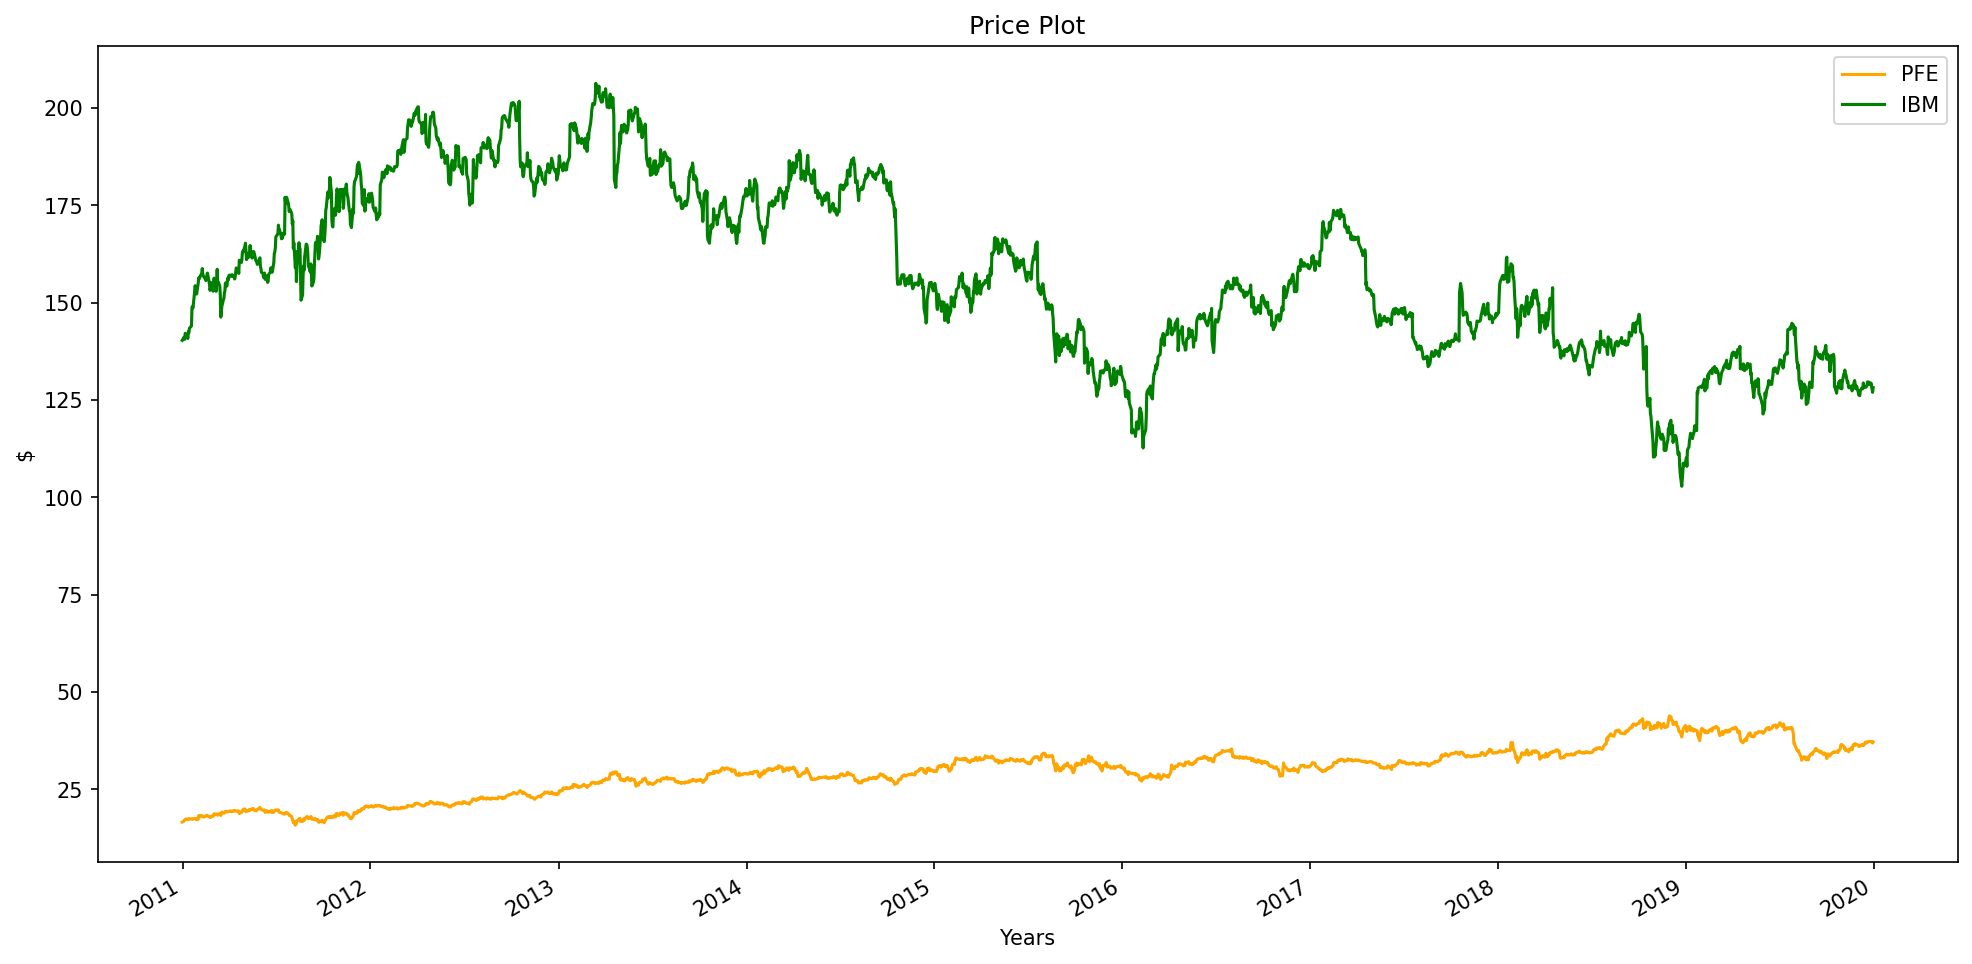

In [11]:
plt.figure(figsize=(16, 8), dpi=150)
data['PFE'].plot(label = "PFE", color = "orange")
data["IBM"].plot(label = "IBM", color = "green")
#data["UNH"].plot(label = "UNH", color = "red")
plt.title("Price Plot")
plt.xlabel("Years")
plt.ylabel("$")
plt.legend()

In [12]:
distanceBetweenStocks(data['IBM'], data['PFE'])

3580.4354686152838

In [20]:
data.columns

Index(['HD', 'DIS', 'MSFT', 'BA', 'MMM', 'PFE', 'NKE', 'JNJ', 'MCD', 'INTC',
       'XOM', 'GS', 'JPM', 'AXP', 'V', 'IBM', 'UNH', 'PG', 'GE', 'KO', 'CSCO',
       'CVX', 'CAT', 'MRK', 'WMT', 'VZ', 'RTX', 'TRV', 'AAPL', 'ADBE', 'EBAY',
       'QCOM', 'HPQ', 'JNPR', 'AMD'],
      dtype='object', name='Symbols')

In [22]:
data.columns[0]

'HD'

In [26]:
data[data.columns[0]]

Date
2010-12-31     35.060001
2011-01-03     35.310001
2011-01-04     34.669998
2011-01-05     34.560001
2011-01-06     34.419998
                 ...    
2019-12-24    220.669998
2019-12-26    220.820007
2019-12-27    219.970001
2019-12-30    217.309998
2019-12-31    218.380005
Name: HD, Length: 2265, dtype: float64

In [32]:
getBestKLessDistanceStocks(data, 10)

[['MSFT', 'ADBE', 223.22022902935979],
 ['MSFT', 'V', 306.5333286524149],
 ['BA', 'ADBE', 326.61871667160625],
 ['V', 'ADBE', 339.59343932600694],
 ['HD', 'V', 395.1777079408773],
 ['V', 'CSCO', 402.08516523282907],
 ['CSCO', 'ADBE', 413.5610996893511],
 ['JPM', 'UNH', 436.26980941582144],
 ['HD', 'UNH', 447.2112481602388],
 ['NKE', 'V', 450.9293579350193]]